In [144]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [145]:
data  = pd.read_csv('Python_Credit_Risk_XTrain.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [146]:
data.shape

(614, 13)

# Data Preprocessing

In [147]:
data = data.drop(['Loan_ID'],axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Handling missing values

In [148]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [149]:
data.isnull().sum()/len(data)*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [151]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [152]:
data['Gender'] = data['Gender'].fillna('Male')

In [153]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [154]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [155]:
data['Married'] = data['Married'].fillna('Yes')
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [156]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [157]:
data['Dependents'] = data['Dependents'].fillna('0')
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [158]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [159]:
data['Self_Employed'] = data['Self_Employed'].fillna('No')
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [160]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

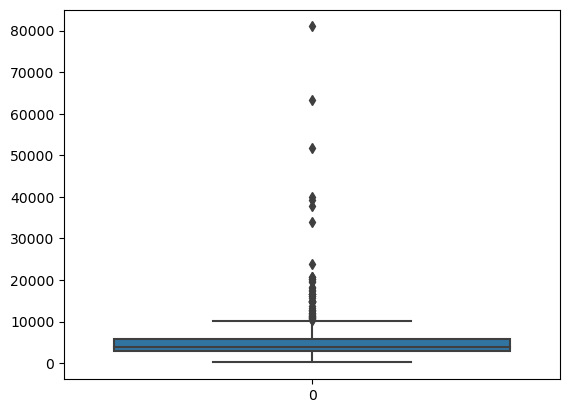

In [161]:
sns.boxplot(data['ApplicantIncome']) 

<Axes: >

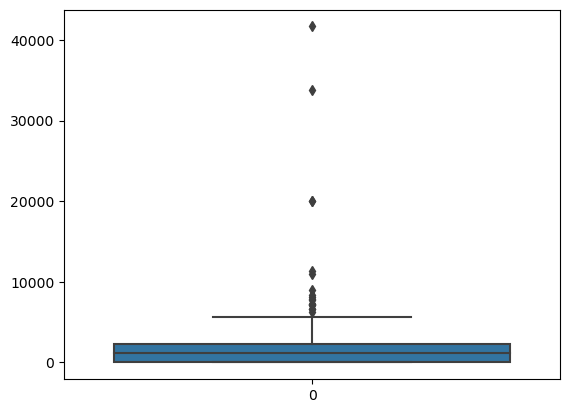

In [162]:
sns.boxplot(data['CoapplicantIncome']) 

<Axes: >

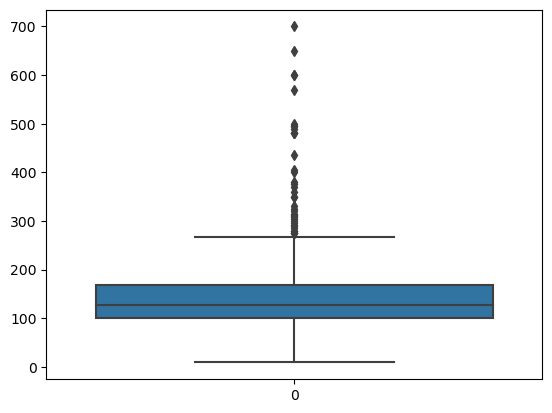

In [163]:
sns.boxplot(data['LoanAmount'])

In [164]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

<Axes: >

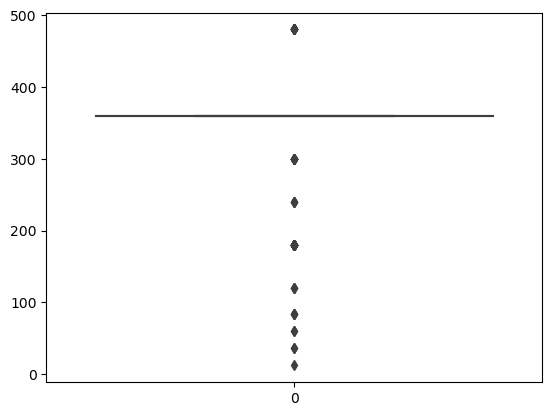

In [165]:
sns.boxplot(data['Loan_Amount_Term'])

In [166]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

<Axes: >

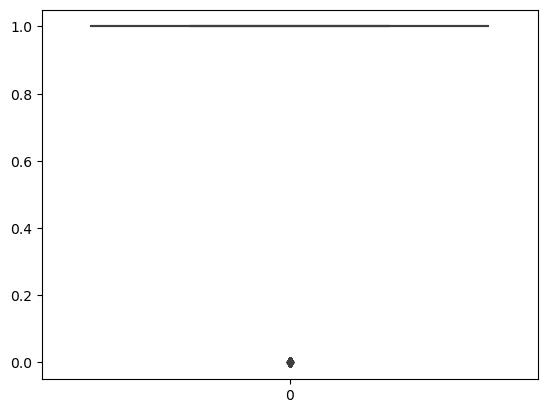

In [167]:
sns.boxplot(data['Credit_History'])

In [168]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [169]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [170]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature Scaling

In [171]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [172]:
x = data.iloc[:,6:10]
x.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,128.0,360.0,1.0
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,2358.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0


In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [174]:
x

array([[-0.55448733, -0.21124125,  0.2732313 ,  0.41173269],
       [-0.03873155, -0.21124125,  0.2732313 ,  0.41173269],
       [-0.55448733, -0.94899647,  0.2732313 ,  0.41173269],
       ...,
       [-0.47240418,  1.27616847,  0.2732313 ,  0.41173269],
       [-0.55448733,  0.49081614,  0.2732313 ,  0.41173269],
       [-0.55448733, -0.15174486,  0.2732313 , -2.42876026]])

In [175]:
x = pd.DataFrame(x,columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,-0.554487,-0.211241,0.273231,0.411733
1,-0.038732,-0.211241,0.273231,0.411733
2,-0.554487,-0.948996,0.273231,0.411733
3,0.251980,-0.306435,0.273231,0.411733
4,-0.554487,-0.056551,0.273231,0.411733


In [176]:
data['LoanAmount'] = x['LoanAmount']
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.273231,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,0.273231,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,0.273231,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,0.273231,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,0.273231,360.0,1.0,Urban,Y


In [177]:
data['ApplicantIncome'] = x['ApplicantIncome']
data['CoapplicantIncome'] = x['CoapplicantIncome']
data['Loan_Amount_Term'] = x['Loan_Amount_Term']
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,-0.554487,-0.211241,0.273231,0.411733,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,-0.038732,-0.211241,0.273231,0.411733,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.554487,-0.948996,0.273231,0.411733,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,0.251980,-0.306435,0.273231,0.411733,1.0,Urban,Y
4,Male,No,0,Graduate,No,-0.554487,-0.056551,0.273231,0.411733,1.0,Urban,Y


In [178]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000
mean,4.050325e-17,-2.603780e-17,5.930833e-17,-1.620130e-16,0.855049
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,0.352339
min,-5.544873e-01,-1.627255e+00,-5.132498e+00,-2.428760e+00,0.000000
25%,-5.544873e-01,-5.414462e-01,2.732313e-01,4.117327e-01,1.000000
50%,-1.480047e-01,-2.112412e-01,2.732313e-01,4.117327e-01,1.000000
75%,2.312023e-01,2.260572e-01,2.732313e-01,4.117327e-01,1.000000
max,1.369617e+01,6.595146e+00,2.137276e+00,4.117327e-01,1.000000


## Handling Outliers

In [179]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
dataset = data[~((data< (q1-1.5*iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]

In [180]:
dataset.shape

(418, 12)

<Axes: >

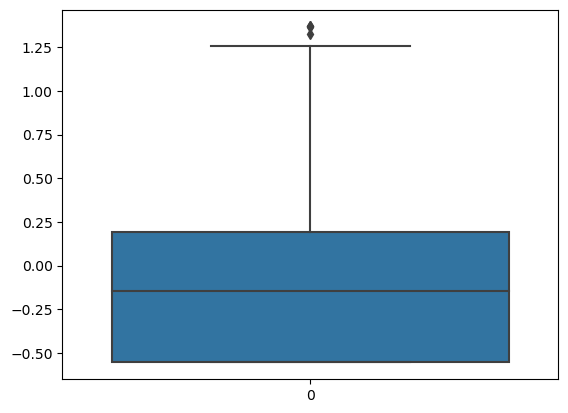

In [181]:
sns.boxplot(dataset['ApplicantIncome'])

<Axes: >

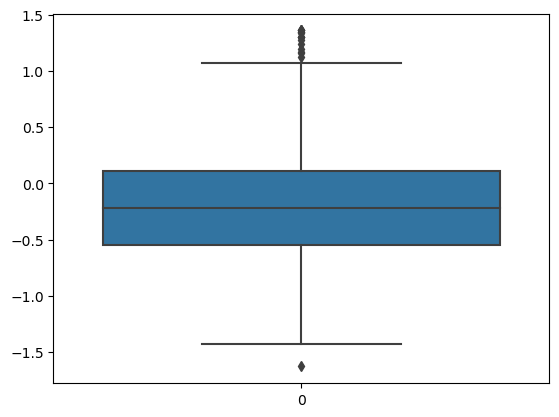

In [182]:
sns.boxplot(dataset['CoapplicantIncome']) 

<Axes: >

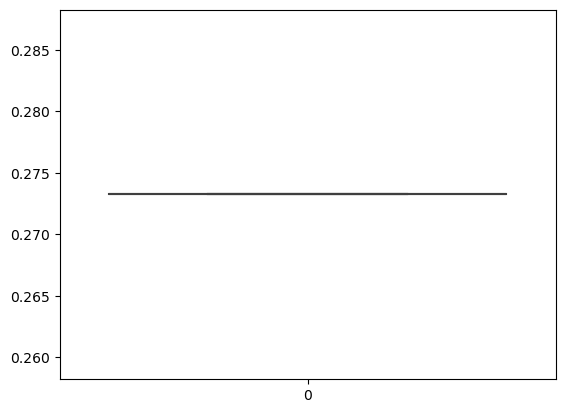

In [183]:
sns.boxplot(dataset['LoanAmount'])

<Axes: >

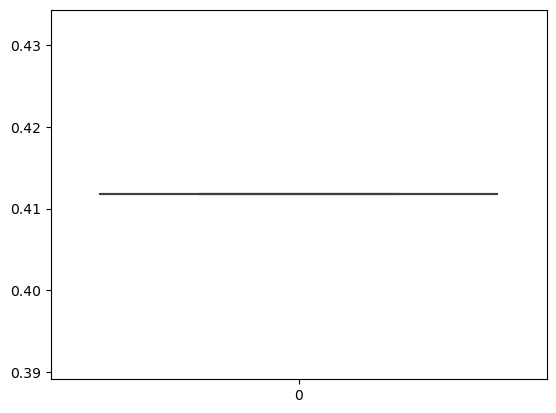

In [184]:
sns.boxplot(dataset['Loan_Amount_Term'])

In [185]:
dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Encoding 

In [186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             418 non-null    object 
 1   Married            418 non-null    object 
 2   Dependents         418 non-null    object 
 3   Education          418 non-null    object 
 4   Self_Employed      418 non-null    object 
 5   ApplicantIncome    418 non-null    float64
 6   CoapplicantIncome  418 non-null    float64
 7   LoanAmount         418 non-null    float64
 8   Loan_Amount_Term   418 non-null    float64
 9   Credit_History     418 non-null    float64
 10  Property_Area      418 non-null    object 
 11  Loan_Status        418 non-null    object 
dtypes: float64(5), object(7)
memory usage: 58.6+ KB


In [187]:
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes
dataset  = pd.get_dummies(dataset,columns=['Gender'])
dataset.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_0,Gender_1
0,No,0,Graduate,No,-0.554487,-0.211241,0.273231,0.411733,1.0,Urban,Y,0,1
1,Yes,1,Graduate,No,-0.038732,-0.211241,0.273231,0.411733,1.0,Rural,N,0,1
2,Yes,0,Graduate,Yes,-0.554487,-0.948996,0.273231,0.411733,1.0,Urban,Y,0,1
3,Yes,0,Not Graduate,No,0.251980,-0.306435,0.273231,0.411733,1.0,Urban,Y,0,1
4,No,0,Graduate,No,-0.554487,-0.056551,0.273231,0.411733,1.0,Urban,Y,0,1


In [188]:
dataset['Married'] = dataset['Married'].astype('category')
dataset['Married'] = dataset['Married'].cat.codes
dataset['Education'] = dataset['Education'].astype('category')
dataset['Education'] = dataset['Education'].cat.codes
dataset['Self_Employed'] = dataset['Self_Employed'].astype('category')
dataset['Self_Employed'] = dataset['Self_Employed'].cat.codes
dataset['Property_Area'] = dataset['Property_Area'].astype('category')
dataset['Property_Area'] = dataset['Property_Area'].cat.codes
dataset= pd.get_dummies(dataset, columns =['Married', 'Dependents','Education','Self_Employed','Property_Area'])
dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_0,Gender_1,Married_0,Married_1,...,Dependents_1,Dependents_2,Dependents_3+,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Property_Area_0,Property_Area_1,Property_Area_2
0,-0.554487,-0.211241,0.273231,0.411733,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.038732,-0.211241,0.273231,0.411733,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,-0.554487,-0.948996,0.273231,0.411733,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,0.251980,-0.306435,0.273231,0.411733,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,-0.554487,-0.056551,0.273231,0.411733,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [189]:
dataset.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_0',
       'Gender_1', 'Married_0', 'Married_1', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_0', 'Education_1',
       'Self_Employed_0', 'Self_Employed_1', 'Property_Area_0',
       'Property_Area_1', 'Property_Area_2'],
      dtype='object')

In [190]:
dataset.drop(['Gender_0','Married_0','Dependents_0','Education_0','Self_Employed_0','Property_Area_0'], inplace=True,axis=1)
dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3+,Education_1,Self_Employed_1,Property_Area_1,Property_Area_2
0,-0.554487,-0.211241,0.273231,0.411733,1.0,Y,1,0,0,0,0,0,0,0,1
1,-0.038732,-0.211241,0.273231,0.411733,1.0,N,1,1,1,0,0,0,0,0,0
2,-0.554487,-0.948996,0.273231,0.411733,1.0,Y,1,1,0,0,0,0,1,0,1
3,0.251980,-0.306435,0.273231,0.411733,1.0,Y,1,1,0,0,0,1,0,0,1
4,-0.554487,-0.056551,0.273231,0.411733,1.0,Y,1,0,0,0,0,0,0,0,1


In [191]:
dataset.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_1',
       'Married_1', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_1', 'Self_Employed_1', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')

In [192]:
dataset = dataset[['Gender_1','Married_1', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_1', 'Self_Employed_1','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','Property_Area_1', 'Property_Area_2','Loan_Status']]
dataset.head()
                   

,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3+,Education_1,Self_Employed_1,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_1,Property_Area_2,Loan_Status
0,1,0,0,0,0,0,0,-0.554487,-0.211241,0.273231,0.411733,1.0,0,1,Y
1,1,1,1,0,0,0,0,-0.038732,-0.211241,0.273231,0.411733,1.0,0,0,N
2,1,1,0,0,0,0,1,-0.554487,-0.948996,0.273231,0.411733,1.0,0,1,Y
3,1,1,0,0,0,1,0,0.251980,-0.306435,0.273231,0.411733,1.0,0,1,Y
4,1,0,0,0,0,0,0,-0.554487,-0.056551,0.273231,0.411733,1.0,0,1,Y


## Imbalance checking

In [193]:
dataset['Loan_Status'].value_counts()

Y    339
N     79
Name: Loan_Status, dtype: int64

In [194]:
# majority = 339
# minority = 79
# majotity > 2* minority
# The dataset is imbalanced datset

In [195]:
x = dataset.drop(['Loan_Status'],axis=1 )
y =dataset['Loan_Status']

In [196]:
x.head()

,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3+,Education_1,Self_Employed_1,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_1,Property_Area_2
0,1,0,0,0,0,0,0,-0.554487,-0.211241,0.273231,0.411733,1.0,0,1
1,1,1,1,0,0,0,0,-0.038732,-0.211241,0.273231,0.411733,1.0,0,0
2,1,1,0,0,0,0,1,-0.554487,-0.948996,0.273231,0.411733,1.0,0,1
3,1,1,0,0,0,1,0,0.251980,-0.306435,0.273231,0.411733,1.0,0,1
4,1,0,0,0,0,0,0,-0.554487,-0.056551,0.273231,0.411733,1.0,0,1


In [197]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [198]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over,y_over = over.fit_resample(x,y)

In [199]:
print(x_over.shape)
print(y_over.shape)

(678, 14)
(678,)


In [200]:
y_over.value_counts()

Y    339
N    339
Name: Loan_Status, dtype: int64

# split the data into train and test for model building and prediction

In [201]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,train_size=0.75, random_state=101)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(508, 14)
(508,)
(170, 14)
(170,)


# SVM model
## 1. Kernel = Linear
## 2. Kernel = Sigmoid
## 3. Kernel = Polynomial
## 4. Kernel = RBF

In [202]:
from sklearn.svm import SVC
# default kernel is rbf
model = SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [203]:
y_predict = model.predict(x_test)
y_predict_train = model.predict(x_train)

In [204]:
y_predict

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'N'], dtype=object)

In [205]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [206]:
print(classification_report(y_test,y_predict))
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           N       0.58      0.78      0.67        73
           Y       0.78      0.58      0.66        97

    accuracy                           0.66       170
   macro avg       0.68      0.68      0.66       170
weighted avg       0.69      0.66      0.66       170

              precision    recall  f1-score   support

           N       0.70      0.86      0.77       266
           Y       0.79      0.60      0.69       242

    accuracy                           0.74       508
   macro avg       0.75      0.73      0.73       508
weighted avg       0.75      0.74      0.73       508



In [207]:
print(confusion_matrix(y_test,y_predict))
print(confusion_matrix(y_train,y_predict_train))

[[57 16]
 [41 56]]
[[228  38]
 [ 96 146]]


In [208]:
print("Test Accuracy")
print(accuracy_score(y_test,y_predict))
print("Train Accuracy")
print(accuracy_score(y_train,y_predict_train))

Test Accuracy
0.6647058823529411
Train Accuracy
0.7362204724409449


## Kernel = Linear

In [209]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [210]:
y_predict_lin = model_linear.predict(x_test)
y_predict_lin_train = model_linear.predict(x_train)

In [211]:
print("Test Accuracy")
print(accuracy_score(y_test,y_predict_lin))
print("Train Accuracy")
print(accuracy_score(y_train,y_predict_lin_train))

Test Accuracy
0.611764705882353
Train Accuracy
0.6082677165354331


## Kernel = Sigmoid

In [212]:
model_sig = SVC(kernel='sigmoid')
model_sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [213]:
y_predict_sig = model_linear.predict(x_test)
y_predict_sig_train = model_linear.predict(x_train)

In [214]:
print("Test Accuracy")
print(accuracy_score(y_test,y_predict_sig))
print("Train Accuracy")
print(accuracy_score(y_train,y_predict_sig_train))

Test Accuracy
0.611764705882353
Train Accuracy
0.6082677165354331


## Kernel = Poly

In [215]:
model_pol = SVC(kernel='poly')
model_pol.fit(x_train,y_train)

SVC(kernel='poly')

In [216]:
y_predict_pol = model_linear.predict(x_test)
y_predict_pol_train = model_linear.predict(x_train)

In [217]:
print("Test Accuracy")
print(accuracy_score(y_test,y_predict_pol))
print("Train Accuracy")
print(accuracy_score(y_train,y_predict_pol_train))

Test Accuracy
0.611764705882353
Train Accuracy
0.6082677165354331


# Logistic Regression


In [218]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [219]:
y_predict_lr = lr.predict(x_test)
y_predict_lr_train = lr.predict(x_train)

In [220]:
print(accuracy_score(y_test,y_predict_lr))
print(accuracy_score(y_train,y_predict_lr_train))

0.6352941176470588
0.6535433070866141


# Kernel = rbf gives the better result compare to llinear, polynomial,sigmoid and logistic regression
##  improve the model accuracy by cross validation techniques

# Cross Validation

### CV = K-folds, split the train model into k folds and the train the model with all  spllit except the current fold

In [241]:
from sklearn.model_selection import cross_val_score
accuracy_test = cross_val_score(model,x_test,y_test,cv=20)
accuracy_train = cross_val_score(model,x_train,y_train,cv=20)


In [235]:
print(accuracy_test)

[0.55555556 0.77777778 0.22222222 0.77777778 0.55555556 0.66666667
 0.66666667 0.55555556 0.44444444 0.88888889 0.5        0.625
 0.5        0.25       0.625      0.625      0.625      0.5
 0.75       0.5       ]


In [236]:
print(accuracy_train)

[0.65384615 0.65384615 0.57692308 0.73076923 0.73076923 0.73076923
 0.73076923 0.65384615 0.72       0.64       0.64       0.84
 0.64       0.64       0.64       0.72       0.6        0.68
 0.88       0.68      ]


In [237]:
print(accuracy_test[9])
print(accuracy_train[18])

0.8888888888888888
0.88


In [240]:
print(np.max(accuracy_test))
print(np.max(accuracy_train))

0.8888888888888888
0.88


In [226]:
accuracy_test = cross_val_score(model_linear,x_test,y_test,cv=10)
accuracy_train = cross_val_score(model_linear,x_train,y_train,cv=10)
print(accuracy_test)
print('\n')
print(accuracy_train)

[0.70588235 0.52941176 0.76470588 0.64705882 0.47058824 0.58823529
 0.52941176 0.58823529 0.58823529 0.58823529]


[0.60784314 0.58823529 0.68627451 0.64705882 0.60784314 0.58823529
 0.62745098 0.50980392 0.5        0.66      ]


 # Grid Search CV

In [243]:
from sklearn.svm import SVC
SVC

In [242]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# create a dictionary called param_grid and fill out parameters for c and gamma

In [258]:
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
# C is  cost of misclassification 
# gaama influence of samples on deciding the effective hyperplane
# Higher the C value,better the model
# lower the gaama value, better the model  and we are looking better optimum value

grid = GridSearchCV(SVC(), param_grid, refit=True)


In [259]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [260]:
grid_predict = grid.predict(x_test)
grid_predict_train = grid.predict(x_train)

print("Test Accuracy")
print(accuracy_score(y_test,grid_predict))
print("Train Accuracy")
print(accuracy_score(y_train,grid_predict_train))

print("Best tunde Hyperparameter K : {}".format(grid.best_params_))

Test Accuracy
0.8058823529411765
Train Accuracy
0.9566929133858267
Best tunde Hyperparameter K : {'C': 100, 'gamma': 1}


In [ ]:
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid_predict = grid.predict(x_test)
grid_predict_train = grid.predict(x_train)

print("Test Accuracy")
print(accuracy_score(y_test,grid_predict))
print("Train Accuracy")
print(accuracy_score(y_train,grid_predict_train))

print("Best tunde Hyperparameter K : {}".format(grid.best_params_))